【問題1】チャンネル数を1に限定した1次元畳み込み層クラスの作成

【問題4】チャンネル数を限定しない1次元畳み込み層クラスの作成

In [1]:
class SimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
    n_nodes1:
    n_nodes2:
    ガウス分布の標準偏差
    """
    
    def __init__(self, sigma=0.01):
        self.sigma = sigma
        
    def W(self, output_channel, input_chanel, filter_size):
        """
        重みの初期化
        Parameters
        ----------
        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(output_channel, input_chanel, filter_size)
        return W
    
    
    def B(self, output_channel):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
        後の層のノード数
        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(output_channel)[np.newaxis, :]
        
        return B

In [2]:
class FCSimpleInitializer:
    """
    ガウス分布によるシンプルな初期化
    Parameters
    ----------
    sigma : float
    n_nodes1:
    n_nodes2:
    ガウス分布の標準偏差
    """
    
    def __init__(self, sigma=0.01):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        """
        重みの初期化
        Parameters
        ----------
        Returns
        ----------
        W :
        """
        W = self.sigma * np.random.randn(n_nodes1, n_nodes2)
        return W
    
    
    def B(self, n_nodes2):
        """
        バイアスの初期化
        Parameters
        ----------
        n_nodes2 : int
        後の層のノード数
        Returns
        ----------
        B :
        """
        B = self.sigma * np.random.randn(n_nodes2)[np.newaxis, :]
        
        return B

In [3]:
class Xavier:
    def __init__(self, sigma=0.01):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        W_xavi = self.sigma * np.random.randn(n_nodes1, n_nodes2)/np.sqrt(n_nodes1)
        
        return W_xavi
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn (n_nodes2)[np.newaxis, :]
    
        return B

In [4]:
class He:
    def __init__(self, sigma=0.01):
        self.sigma = sigma
        
    def W(self, n_nodes1, n_nodes2):
        W_he = self.sigma * np.random.randn(n_nodes1, n_nodes2)/np.sqrt(n_nodes1)*np.sqrt(2)
        
        return W_he
    
    def B(self, n_nodes2):
        B = self.sigma * np.random.randn (n_nodes2)[np.newaxis, :]
        
        return B

In [5]:
class SGD:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    def __init__(self, lr):
        self.lr = lr
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        
        Returns
        ----------
        layer : 更新後の層のインスタンス
        """
        layer.W -= self.lr * layer.dW
        layer.B -= self.lr * layer.dB
        
        return layer

【問題7】最適化手法

In [6]:
class AdaGrad:
    """
    確率的勾配降下法
    Parameters
    ----------
    lr : 学習率
    """
    
    def __init__(self, lr):
        self.lr = lr
        self.h = 1e-7
        
    def update(self, layer):
        """
        ある層の重みやバイアスの更新
        Parameters
        ----------
        layer : 更新前の層のインスタンス
        
        Returns
        ----------
        layer : 更新後の層のインスタンス
        """
        self.h += layer.dW*layer.dW
        layer.W -= self.lr*layer.dW/np.sqrt(self.h)
        layer.B -= self.lr * layer.dB
        
        return layer

In [7]:
class Sigmoid:
    """
    sigmoid関数の処理と導関数の算出
    """
    
    def __init__(self):
        pass
        
    def forward(self, A):
        self.A  = A
        Z = 1/(1+np.exp(-self.A))
        
        return Z
    
    def backward(self, dout):
        Z = self.forward(self.A)
        dout_sig = Z*(1-Z)*dout
        
        return dout_sig
    
class Tanh:
    """
    tanh関数の処理と導関数の算出
    """
    def __init__(self):
        pass
    
    def forward(self, A):
        self.A = A
        Z = (np.exp(self.A)-np.exp(-self.A)) / (np.exp(self.A)+np.exp(-self.A))
        
        return Z
    
    def backward(self, dout):
        Z = self.forward(self.A)
        dout_tanh = (1-Z**2)*dout
        
        return dout_tanh
    
class Relu:
    """
    relu関数の処理と導関数の算出
    """
    
    def __init__(self):
        pass
    
    def forward(self, A):
        self.A = A
        Z = np.where(self.A<=0, 0, self.A)
        
        return Z
    
    def backward(self, dout):
        dout_relu = np.where(self.A<=0, 0, 1)*dout
        
        return dout_relu
    
class Softmax:
    """
    relu関数の処理とsoftmax_with_cross_entropyの導関数の算出
    """
    def __init__(self):
        self.Z = None
    
    def forward(self, A):
        #if A.ndim == 2:
           # A = A.T
           # A = A - np.max(A, axis=0)
           # y = np.exp(A) / np.sum(np.exp(A), axis=0)
           # return y.T
        A = A - np.max(A)
        Z = np.exp(A) / np.sum(np.exp(A) ,axis=1, keepdims=True)
        self.Z = Z
        
        return Z
    
    
    def backward(self, y):
        dout_soft_max = self.Z - y
        
        return dout_soft_max

In [8]:
class GetMiniBatch:
    """
    ミニバッチを取得するイテレータ

    Parameters
    ----------
    X : 次の形のndarray, shape (n_samples, n_features)
      学習データ
    y : 次の形のndarray, shape (n_samples, 1)
      正解値
    batch_size : int
      バッチサイズ
    seed : int
      NumPyの乱数のシード
    """
    def __init__(self, X, y, batch_size = 10, seed=0):
        self.batch_size = batch_size
        np.random.seed(seed)
        shuffle_index = np.random.permutation(np.arange(X.shape[0]))
        self.X = X[shuffle_index]
        self.y = y[shuffle_index]
        self._stop = np.ceil(X.shape[0]/self.batch_size).astype(np.int)

    def __len__(self):
        return self._stop

    def __getitem__(self,item):
        p0 = item*self.batch_size
        p1 = item*self.batch_size + self.batch_size
        return self.X[p0:p1], self.y[p0:p1]        

    def __iter__(self):
        self._counter = 0
        return self

    def __next__(self):
        if self._counter >= self._stop:
            raise StopIteration()
        p0 = self._counter*self.batch_size
        p1 = self._counter*self.batch_size + self.batch_size
        self._counter += 1
        return self.X[p0:p1], self.y[p0:p1]
    

【問題2】1次元畳み込み後の出力サイズの計算

In [9]:
class Scratch1dCNNClassifier:
    """
    2次元の畳み込み
    Parameters
    ----------
    filter_size : int
      フィルターの大きさ=Wの要素数
    initializer : 重みの初期値の決定
    初期化方法のインスタンス
    optimizer : 最適化手法を選択
    最適化手法のインスタンス
    """
    
    def __init__(self, in_channel, out_channel, filter_size, initializer, optimizer, pad=0, stride=1):
        self.in_channel = in_channel
        self.out_channel = out_channel
        self.filter_size = filter_size
        self.initializer = initializer
        self.optimizer = optimizer
        self.pad = pad
        self.stride = stride
        
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.sample_size = 0
        self.W = self.initializer.W(self.out_channel, self.in_channel, self.filter_size)
        self.B = self.initializer.B(out_channel)
        self.A = 0
        self.Z = 0
        self.dW = np.zeros_like(self.W)
        self.dB = np.zeros_like(self.B)
        
    def calculate_out_put_size(self, input_size):
        """
        outputのsizeを計算する
        """
        output_size = 1 + (input_size + 2*self.pad - self.filter_size)//self.stride
        
        return output_size
    
        
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, in_channel, input_size)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (n_samples, out_channel, output_size)
            出力
        """
        
        self.Z = copy.deepcopy(X)
        self.batch_size = len(X)
        input_size = X.shape[2]
        
        output_size = self.calculate_out_put_size(input_size)
        
        A = np.zeros([self.batch_size, self.out_channel, output_size])
        
        # sample方向、channel方向、out_channelの方向、height方向、width方向にループを回す
        for n in range(self.batch_size):
            for k in range(X.shape[1]):
                for m in range(self.out_channel):
                    for i in range(output_size):
                    
                        if i+self.filter_size> X.shape[2]:#幅のはみ出した部分の削除
                            continue
                        
                        A[n, m, i] = (np.sum(X[n, k, i:i+self.filter_size]*self.W[m, k]) + self.B[0, m]).reshape(-1)
        
        self.A = A
        #print('1dconvA.shape{}'.format(A.shape))
        
        return A
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, out_channel, output_size)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, channel, input_size)
            前に流す勾配
        """
        # dWの算出
        # sample方向、channel方向、out_channelの方向、height方向、width方向にループを回す
        for n in range(self.batch_size):
            for k in range(self.Z.shape[1]):
                for m in range(self.out_channel):
                    for i in range(dA.shape[2]):
                        for s in range(self.filter_size):
                            self.dW[m, k, s] += (dA[n, m, i]*self.Z[n, k, i+s]).reshape(-1)
                                    
        
        # dBの算出
        for m in range(dA.shape[1]):
            self.dB[0, m] = np.sum(dA[:,m,:]).reshape(-1)
            
        # dZの算出
        dZ = np.zeros_like(self.Z)
        for n in range(self.batch_size):
            for k in range(self.Z.shape[1]):
                for m in range(dA.shape[1]):
                    for i in range(dA.shape[2]):
                        for s in range(self.filter_size):
                            #  iとsの条件
                            if (i-s)/self.stride < 0:
                                continue
                            elif (i-s)/self.stride > dA.shape[2]-1:
                                continue
                            elif (i-s)%self.stride != 0:#strideの定数倍のみ残す
                                continue
                                            
                            dZ[n, k, i] += dA[n, m, i-s] * self.W[m, k, s]
        self = self.optimizer.update(self)# 1dCNNクラスのself.W, self.B, self.dW, self.dBを用いて更新
        
        #print('1d_conv_dA{}'.format(dA))
        
        return dZ

In [10]:
class OnedCNNClassifier:
    """
    1次元の畳み込み層を実装
    Parameters
    ----------
    filter_size : int
      フィルターの大きさ=Wの要素数
    initializer : 重みの初期値の決定
    初期化方法のインスタンス
    optimizer : 最適化手法を選択
    最適化手法のインスタンス
    
    """
    def __init__(self,input_channel, output_channel, filter_size, initializer, optimizer, pad=0, stride=1):
        self.input_channel = input_channel
        self.output_channel = output_channel
        self.filter_size = filter_size
        self.initializer = initializer
        self.optimizer = optimizer
        self.pad = pad
        self.stride = stride
        
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.input_features = 0
        self.W = self.initializer.W(self.output_channel, self.input_channel, self.filter_size)
        self.B = self.initializer.B(output_channel)
        self.A = 0
        self.Z = 0
        
        self.dW = np.zeros_like(self.W)
        self.dB = np.zeros_like(self.B)
    
    def calculate_out_put_size(self, input_features):
        """
        outputのfilterを計算する
        """
        output_features = 1 + (input_features + 2*self.pad - self.filter_size)//self.stride
        
        return output_features
    
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (n_sample, input_chanel, input_features)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (n-sample, output_chanel, output_features)   n_ = (input_features + 2*pad - filter_size) / stride +1
            出力
        """
        self.Z = copy.deepcopy(X)
        self.samples = X.shape[0]
        self.input_channel = X.shape[1]
        self.input_features = X.shape[2]
        
        # 出力Aの0配列を作る
        output_features = self.calculate_out_put_size(self.input_features)
        A = np.zeros((self.samples, self.output_channel, output_features))
        # paddingのとき、Xの配列を変形する
        if self.pad!=0:
            pad = Pad()
            X = pad.fit(X)

        # 出力の特徴量の数とsample数回文for文回す
        for n in range(self.samples):
            for k in range(self.input_channel):
                for m in range(self.output_channel):
                    for i in range(output_features):
                        if i+self.filter_size > X.shape[2]:#端っこの削除
                            continue
                        A[n, m, i] = (np.sum(X[n, k, i:i+self.filter_size]*self.W[m, k]) + self.B[0, m]).reshape(-1)
                        
                
                
        self.A = A
        
        return A
        
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, output_channel, output_features)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, input_chanenl, input_features)
            前に流す勾配
        """
        # dWの算出
        for n in range(self.samples):
            for k in range(self.Z.shape[1]):
                for m in range(dA.shape[1]):
                    for i in range(dA.shape[2]):
                        for s in range(self.W.shape[2]):
                            self.dW[m, k, s] += (dA[n, m, i] * self.Z[n, k, i+s]).reshape(-1)

        # dBの算出
        for m in range(dA.shape[1]):
            self.dB[0, m] = np.sum(dA[:,m,:]).reshape(-1)
            print(dA)
            
        # dZの算出
        dZ = np.zeros_like(self.Z)
        for n in range(self.samples):
            for k in range(self.Z.shape[1]):
                for m in range(dA.shape[1]):
                    for j in range(dA.shape[2]):
                        for s in range(self.filter_size):
                            
                            if (j-s)/self.stride < 0:
                                continue
                            elif (j-s)/self.stride > dA.shape[2]-1:
                                continue
                            elif j-s % self.stride != 0:#strideの定数倍のみ残す
                                continue
                                
                            dZ[n, k, j] += dA[n, m, j-s] * self.W[m, k, s]
                            
        
        self = self.optimizer.update(self)# 1dCNNクラスのself.W, self.B, self.dW, self.dBを用いて更新
        
        return dZ

In [11]:
class Dropout:
    """
    randomに生成したWと同じ配列の要素でdroput_ratioを以下のものをFalseとして格納
    """
    def __init__(self, dropout_ratio=0.5):
        self.dropout_ratio = dropout_ratio
        self.mask = None
        
    def forward(self, X, train_flag=True):
        if train_flag:
            self.mask = np.random.rand(*X.shape) > self.dropout_ratio # *X.shapeはXと同じshapeにするため
            return X*self.mask
        
        else:
            return X*(1-self.dropout_ratio)
        
    def backward(self, dout):
        
        return dout * self.mask

In [12]:
class Loss:
    
    def __init__(self):
        pass
        
    def cross_entropy_error(self, y_pred, y):
        cross_entropy_error = np.sum(-1*y*np.log(y_pred+1e-10),axis=1)
        
        return cross_entropy_error

In [13]:
class FC:
    """
    ノード数n_nodes1からn_nodes2への全結合層
    Parameters
    ----------
    n_nodes1 : int
      前の層のノード数
    n_nodes2 : int
      後の層のノード数
    initializer : 初期化方法のインスタンス
    optimizer : 最適化手法のインスタンス
    """
    def __init__(self, n_nodes1, n_nodes2, initializer, optimizer):
        self.n_nodes1 = n_nodes1
        self.n_nodes2 = n_nodes2
        self.initializer = initializer
        self.optimizer = optimizer
        # initializerのメソッドを使い、self.Wとself.Bを初期化する
        self.W = self.initializer.W(self.n_nodes1, self.n_nodes2)
        self.B = self.initializer.B(self.n_nodes2)
    
    def forward(self, X):
        """
        フォワード
        Parameters
        ----------
        X : 次の形のndarray, shape (batch_size, n_nodes1)
            入力
        Returns
        ----------
        A : 次の形のndarray, shape (batch_size, n_nodes2)
            出力
        """
        # CNNからの入力を1次元配列にする
            
        # XとWの内積をとり、biasを加える
        self.Z = copy.deepcopy(X) # Xが更新されないように
        A = np.dot(X, self.W) + self.B
        
        return A
    
    
    def backward(self, dA):
        """
        バックワード
        Parameters
        ----------
        dA : 次の形のndarray, shape (batch_size, n_nodes2)
            後ろから流れてきた勾配
        Returns
        ----------
        dZ : 次の形のndarray, shape (batch_size, n_nodes1)
            前に流す勾配
        """
        # 勾配を算出する
        self.dB = np.average(dA)
        self.dW = np.dot(self.Z.T, dA)
        
        dZ = np.dot(dA, self.W.T)
        
        self = self.optimizer.update(self)# FCクラスのself.W, self.B, self.dW, self.dBを用いて更新
        
        return dZ

In [35]:
class ScratchDeepNeuralNetrowkClassifier:
    """
    FCでインスタンスを作り、Activationで活性化関数を通したものをaddで追加指定いく
    """
    def __init__(self, epoch, batch_size):
        self.epoch = epoch
        self.batch_size = batch_size
        self.losses = []
        self.val_losses = []
        self.layers = []
        
    def add(self, layer):
        self.layers += [layer] # model.add(インスタンスで層を追加)
    
    def forward_layer(self, X):
        for layer in self.layers:
            X = layer.forward(X)
            
        return X
    
    def backward_layer(self, y):
        for layer in reversed(self.layers):
            y = layer.backward(y)
            
        return y
    
    def fit(self, X, y, X_val=None, y_val=None):
        
        count = 1
        mini_losses = []
        for i in range(self.epoch):
            print('-----------------')
            print('epoch{}回目の学習'.format(i+1))
            get_mini_batch = GetMiniBatch(X, y, self.batch_size, seed=10)
            #if X_val is not None and y_val is not None:
            
            # minibatchのイテレーション
            for mini_X_train, mini_y_train in get_mini_batch:
                #イテレーションごとのフォワード
                Z3 = self.forward_layer(mini_X_train)
                mini_loss = Loss()
                mini_train_loss = np.sum(mini_loss.cross_entropy_error(Z3, mini_y_train))/len(mini_y_train)
                if count % 10 == 0:
                    print('ミニバッチ{}回目'.format(count))
                    mini_losses += [mini_train_loss]
                    print('mini_train_loss{}'.format(mini_train_loss))

                #イテレーションごとのバックワード
                dX = self.backward_layer(mini_y_train)# 使わない
                count += 1
                
                
            loss = Loss()
            Z3_train = self.forward_layer(X_train)
            epoch_train_loss = np.sum(loss.cross_entropy_error(Z3_train, y_train))/len(y_train) # 最後の重みでエポックlossを算出
            self.losses += [epoch_train_loss]
            print('epoch_train_loss{}'.format(epoch_train_loss))
            
            if np.any(X_val):
                val_loss = Loss()
                Z3_val = self.forward_layer(X_val)
                epoch_val_loss = np.sum(loss.cross_entropy_error(Z3_val, y_val))/len(y_val) # val_lossもtrain
                self.val_losses += [epoch_val_loss] 
                print(('epoch_val_loss{}'.format(epoch_val_loss)))
                
                
    def predict(self, X_test):
        X = X_test
        for layer in self.layers:
            X = layer.forward(X)
        
        y_pred = np.argmax(X, axis=1)
        
        return y_pred
    
    def accuracy(self, X_test, y_test):
        y_pred = self.predict(X_test)
        accuracy = np.sum(y_pred==y_test)/len(y_test)
        
        return accuracy


In [36]:
class Flatten():
    """
    forwardで4次元配列を2次元にする
    backwardで元の配列を4次元に戻す
    """
    def __init__(self):
        self.Z = 0
    
    def forward(self, X):
        """
        forward:
        入力X:次の形のndarray, (n_samples, channel, h, w)
        
        -------------------------
        出力A:次の形のndarray, (n_samples, n_features)
        """
        
        self.Z = copy.deepcopy(X)
        A = X.reshape(len(X), -1)
        
        #print('Flatten A.shape{}'.format(A.shape))
        return A
    
    def backward(self, dA):
        """
        backward:
        入力dA:次の形のndarray, (n_samples, n_features)
        
        -------------------------
        出力dZ:次の形のndarray, (n_samples, cannel, h, w)
        """
        dZ = dA.reshape(self.Z.shape)
        #print('Flatten dZshape{}'.format(dZ.shape))
        
        return dZ
        

In [45]:
import numpy as np
from keras.datasets import mnist
import copy
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [46]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [47]:
X_train = X_train.reshape(-1, 1, 784)
X_test = X_test.reshape(-1, 1,  784)

In [48]:
X_train = X_train.astype(np.float)
X_test = X_test.astype(np.float)
X_train /= 255
X_test /= 255
print(X_train.max()) # 1.0
print(X_train.min()) # 0.0

1.0
0.0


In [49]:
enc = OneHotEncoder(handle_unknown='ignore', sparse=False)
y_train_one_hot = enc.fit_transform(y_train[:, np.newaxis])
y_test_one_hot = enc.transform(y_test[:, np.newaxis])
print(y_train.shape) # (60000,)
print(y_train_one_hot.shape) # (60000, 10)
print(y_train_one_hot.dtype) # float64

(60000,)
(60000, 10)
float64


In [50]:
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train_one_hot, test_size=0.2)
print(X_train.shape) # (48000, 784)
print(X_val.shape) # (12000, 784)

(48000, 1, 784)
(12000, 1, 784)


【問題5】学習・推定

In [60]:
one_d_cnn = ScratchDeepNeuralNetrowkClassifier(5, 10)
one_d_cnn.add(Scratch1dCNNClassifier(1,1, 5, SimpleInitializer(sigma=0.01), AdaGrad(0.001)))
one_d_cnn.add(Dropout(0.2))
one_d_cnn.add(Tanh())
#one_d_cnn.add(Scratch1dCNNClassifier(1,1, 5, SimpleInitializer(sigma=0.01), AdaGrad(0.2)))
#one_d_cnn.add(Dropout(0.2))
#one_d_cnn.add(Relu())
one_d_cnn.add(Flatten())
one_d_cnn.add(FC(780, 20, FCSimpleInitializer(sigma=0.01), AdaGrad(0.001)))
one_d_cnn.add(Tanh())
one_d_cnn.add(FC(20, 10, FCSimpleInitializer(sigma=0.01), AdaGrad(0.001)))
one_d_cnn.add(Softmax())

one_d_cnn.fit(X_train, y_train, X_val, y_val)

-----------------
epoch1回目の学習
ミニバッチ10回目
mini_train_loss2.3039377487594277
ミニバッチ20回目
mini_train_loss2.3024809837450553
ミニバッチ30回目
mini_train_loss2.3016170299053256
ミニバッチ40回目
mini_train_loss2.3028811656349975
ミニバッチ50回目
mini_train_loss2.30459510320847
ミニバッチ60回目
mini_train_loss2.301617883395426
ミニバッチ70回目
mini_train_loss2.3009878767675565
ミニバッチ80回目
mini_train_loss2.3015306739129873
ミニバッチ90回目
mini_train_loss2.2971934602495985
ミニバッチ100回目
mini_train_loss2.3053569223277224
ミニバッチ110回目
mini_train_loss2.303741234520928
ミニバッチ120回目
mini_train_loss2.3025696587909232
ミニバッチ130回目
mini_train_loss2.2986886074157575
ミニバッチ140回目
mini_train_loss2.2994998087051104
ミニバッチ150回目
mini_train_loss2.297621339457796
ミニバッチ160回目
mini_train_loss2.2918180601000566
ミニバッチ170回目
mini_train_loss2.2956482640986993
ミニバッチ180回目
mini_train_loss2.2984241022051055
ミニバッチ190回目
mini_train_loss2.295239571270118
ミニバッチ200回目
mini_train_loss2.291863955090533
ミニバッチ210回目
mini_train_loss2.295680545669944
ミニバッチ220回目
mini_train_loss2.28843462408442

ミニバッチ1830回目
mini_train_loss1.9939024765941382
ミニバッチ1840回目
mini_train_loss2.0932131324662144
ミニバッチ1850回目
mini_train_loss2.0182622083083706
ミニバッチ1860回目
mini_train_loss1.7978729760858279
ミニバッチ1870回目
mini_train_loss1.7952929106472002
ミニバッチ1880回目
mini_train_loss2.093812842542895
ミニバッチ1890回目
mini_train_loss2.045944471311973
ミニバッチ1900回目
mini_train_loss1.7816108593792126
ミニバッチ1910回目
mini_train_loss2.000675405642376
ミニバッチ1920回目
mini_train_loss2.0824886014257227
ミニバッチ1930回目
mini_train_loss2.014462399868454
ミニバッチ1940回目
mini_train_loss1.9583829468242875
ミニバッチ1950回目
mini_train_loss1.9976032899008895
ミニバッチ1960回目
mini_train_loss2.044278174784784
ミニバッチ1970回目
mini_train_loss2.0551631630140994
ミニバッチ1980回目
mini_train_loss1.7636057002004892
ミニバッチ1990回目
mini_train_loss2.1209865921074575
ミニバッチ2000回目
mini_train_loss1.6158800277956575
ミニバッチ2010回目
mini_train_loss1.8471393322896834
ミニバッチ2020回目
mini_train_loss1.9549067117524253
ミニバッチ2030回目
mini_train_loss2.08315919010962
ミニバッチ2040回目
mini_train_loss1.827960486522

ミニバッチ3630回目
mini_train_loss1.5496853927426888
ミニバッチ3640回目
mini_train_loss2.1158385168226013
ミニバッチ3650回目
mini_train_loss1.871400829592049
ミニバッチ3660回目
mini_train_loss1.7501853070608941
ミニバッチ3670回目
mini_train_loss1.7836305792401632
ミニバッチ3680回目
mini_train_loss1.6490068039326062
ミニバッチ3690回目
mini_train_loss1.88414017860325
ミニバッチ3700回目
mini_train_loss1.928329934162247
ミニバッチ3710回目
mini_train_loss1.988991225357081
ミニバッチ3720回目
mini_train_loss1.8568000164881435
ミニバッチ3730回目
mini_train_loss1.9050796185034926
ミニバッチ3740回目
mini_train_loss1.577698337624286
ミニバッチ3750回目
mini_train_loss1.601010046507119
ミニバッチ3760回目
mini_train_loss1.9452367521631935
ミニバッチ3770回目
mini_train_loss1.4641519462781818
ミニバッチ3780回目
mini_train_loss1.558905094723362
ミニバッチ3790回目
mini_train_loss1.701784812113172
ミニバッチ3800回目
mini_train_loss1.5821575942355341
ミニバッチ3810回目
mini_train_loss1.8856974154441573
ミニバッチ3820回目
mini_train_loss1.6013506779337043
ミニバッチ3830回目
mini_train_loss1.7747292101509689
ミニバッチ3840回目
mini_train_loss1.79334610056139

ミニバッチ5400回目
mini_train_loss1.6241180017250503
ミニバッチ5410回目
mini_train_loss1.3470090466424947
ミニバッチ5420回目
mini_train_loss2.019217165850052
ミニバッチ5430回目
mini_train_loss1.852354316349281
ミニバッチ5440回目
mini_train_loss1.6417357636330365
ミニバッチ5450回目
mini_train_loss1.5624697856404757
ミニバッチ5460回目
mini_train_loss1.5302163953468573
ミニバッチ5470回目
mini_train_loss1.5658808404476863
ミニバッチ5480回目
mini_train_loss1.4456696524436725
ミニバッチ5490回目
mini_train_loss1.4014911219538804
ミニバッチ5500回目
mini_train_loss1.7100003641449188
ミニバッチ5510回目
mini_train_loss1.4757323726764682
ミニバッチ5520回目
mini_train_loss1.4282081081539442
ミニバッチ5530回目
mini_train_loss1.7481530105535685
ミニバッチ5540回目
mini_train_loss1.6631129637999813
ミニバッチ5550回目
mini_train_loss1.8891666395812572
ミニバッチ5560回目
mini_train_loss1.7127558559137472
ミニバッチ5570回目
mini_train_loss1.5411407771306584
ミニバッチ5580回目
mini_train_loss1.6891328597315862
ミニバッチ5590回目
mini_train_loss1.866510734668477
ミニバッチ5600回目
mini_train_loss1.7155996557675457
ミニバッチ5610回目
mini_train_loss1.62757437

ミニバッチ7200回目
mini_train_loss1.598210853321855
ミニバッチ7210回目
mini_train_loss1.4998987787372637
ミニバッチ7220回目
mini_train_loss1.5980005479006696
ミニバッチ7230回目
mini_train_loss1.413647016535686
ミニバッチ7240回目
mini_train_loss1.542418412775837
ミニバッチ7250回目
mini_train_loss1.546855285464446
ミニバッチ7260回目
mini_train_loss1.8333356497614353
ミニバッチ7270回目
mini_train_loss1.3331526071376905
ミニバッチ7280回目
mini_train_loss1.7184396021716684
ミニバッチ7290回目
mini_train_loss1.355637700641917
ミニバッチ7300回目
mini_train_loss1.2957247290145073
ミニバッチ7310回目
mini_train_loss1.4518578764394392
ミニバッチ7320回目
mini_train_loss1.5059926423424632
ミニバッチ7330回目
mini_train_loss1.4793861747919828
ミニバッチ7340回目
mini_train_loss1.7261378628905877
ミニバッチ7350回目
mini_train_loss1.271686734012134
ミニバッチ7360回目
mini_train_loss1.4289567096607878
ミニバッチ7370回目
mini_train_loss1.425671930128619
ミニバッチ7380回目
mini_train_loss1.7288348236788598
ミニバッチ7390回目
mini_train_loss1.6365042535474696
ミニバッチ7400回目
mini_train_loss1.6006215753271114
ミニバッチ7410回目
mini_train_loss1.457112883029

ミニバッチ8990回目
mini_train_loss1.2729904698175127
ミニバッチ9000回目
mini_train_loss1.4155075425658468
ミニバッチ9010回目
mini_train_loss1.337045099966104
ミニバッチ9020回目
mini_train_loss1.3097402289786413
ミニバッチ9030回目
mini_train_loss1.2755410483620815
ミニバッチ9040回目
mini_train_loss1.468078266160146
ミニバッチ9050回目
mini_train_loss1.6817289374236235
ミニバッチ9060回目
mini_train_loss1.6011967446929312
ミニバッチ9070回目
mini_train_loss1.2168685106365276
ミニバッチ9080回目
mini_train_loss1.2775512121430888
ミニバッチ9090回目
mini_train_loss1.5440284891838227
ミニバッチ9100回目
mini_train_loss1.1654650600622194
ミニバッチ9110回目
mini_train_loss1.6376332479936526
ミニバッチ9120回目
mini_train_loss1.2898087980913964
ミニバッチ9130回目
mini_train_loss1.3938953778987895
ミニバッチ9140回目
mini_train_loss1.29707675995975
ミニバッチ9150回目
mini_train_loss1.459083378952326
ミニバッチ9160回目
mini_train_loss1.4195049339361216
ミニバッチ9170回目
mini_train_loss1.3536524170049262
ミニバッチ9180回目
mini_train_loss1.4953670973080764
ミニバッチ9190回目
mini_train_loss1.6011659360117174
ミニバッチ9200回目
mini_train_loss1.3912617023

ミニバッチ10750回目
mini_train_loss1.159643160872194
ミニバッチ10760回目
mini_train_loss1.2386857234858595
ミニバッチ10770回目
mini_train_loss1.319372182056599
ミニバッチ10780回目
mini_train_loss1.2542932269788696
ミニバッチ10790回目
mini_train_loss1.5416004384017776
ミニバッチ10800回目
mini_train_loss1.4595761001098526
ミニバッチ10810回目
mini_train_loss1.407941053196567
ミニバッチ10820回目
mini_train_loss1.3136123881103594
ミニバッチ10830回目
mini_train_loss1.4735951591256646
ミニバッチ10840回目
mini_train_loss1.3510474859874473
ミニバッチ10850回目
mini_train_loss1.2538853428025702
ミニバッチ10860回目
mini_train_loss1.1167217651478434
ミニバッチ10870回目
mini_train_loss1.4211344670346633
ミニバッチ10880回目
mini_train_loss1.3119762812433806
ミニバッチ10890回目
mini_train_loss1.2373509337055544
ミニバッチ10900回目
mini_train_loss1.0755865028491605
ミニバッチ10910回目
mini_train_loss1.3094288798498555
ミニバッチ10920回目
mini_train_loss1.2267210108326805
ミニバッチ10930回目
mini_train_loss1.340622863367811
ミニバッチ10940回目
mini_train_loss1.165656808180033
ミニバッチ10950回目
mini_train_loss1.6025020953810998
ミニバッチ10960回目
mini_

ミニバッチ12510回目
mini_train_loss1.1501336786812006
ミニバッチ12520回目
mini_train_loss1.579859823677268
ミニバッチ12530回目
mini_train_loss1.179687856630294
ミニバッチ12540回目
mini_train_loss1.4013677512235438
ミニバッチ12550回目
mini_train_loss1.514594021221188
ミニバッチ12560回目
mini_train_loss1.1987164124023604
ミニバッチ12570回目
mini_train_loss1.0294090437088341
ミニバッチ12580回目
mini_train_loss1.784730056699802
ミニバッチ12590回目
mini_train_loss1.2499465665968816
ミニバッチ12600回目
mini_train_loss1.5645174787768992
ミニバッチ12610回目
mini_train_loss1.2847216718727554
ミニバッチ12620回目
mini_train_loss1.4870555745562222
ミニバッチ12630回目
mini_train_loss1.306269048974864
ミニバッチ12640回目
mini_train_loss1.4404040485284857
ミニバッチ12650回目
mini_train_loss1.4202097308501735
ミニバッチ12660回目
mini_train_loss1.5172545367655352
ミニバッチ12670回目
mini_train_loss1.086480318641461
ミニバッチ12680回目
mini_train_loss1.2765563244673097
ミニバッチ12690回目
mini_train_loss1.1340097084623033
ミニバッチ12700回目
mini_train_loss1.1159404299424092
ミニバッチ12710回目
mini_train_loss1.273290060671209
ミニバッチ12720回目
mini_tr

ミニバッチ14270回目
mini_train_loss1.3348356251578934
ミニバッチ14280回目
mini_train_loss1.6473992426501158
ミニバッチ14290回目
mini_train_loss1.3269771877621181
ミニバッチ14300回目
mini_train_loss1.1766780745153116
ミニバッチ14310回目
mini_train_loss1.3028598781097729
ミニバッチ14320回目
mini_train_loss1.09160798945457
ミニバッチ14330回目
mini_train_loss1.0179409076500698
ミニバッチ14340回目
mini_train_loss1.534158807132904
ミニバッチ14350回目
mini_train_loss1.3040034070412876
ミニバッチ14360回目
mini_train_loss1.3737782839406563
ミニバッチ14370回目
mini_train_loss1.2101788554548931
ミニバッチ14380回目
mini_train_loss1.3059432424328752
ミニバッチ14390回目
mini_train_loss1.1219710563011411
ミニバッチ14400回目
mini_train_loss0.9513874526351286
epoch_train_loss1.2789322055094139
epoch_val_loss1.2804900926383047
-----------------
epoch4回目の学習
ミニバッチ14410回目
mini_train_loss1.3993532366054722
ミニバッチ14420回目
mini_train_loss1.1016912887294263
ミニバッチ14430回目
mini_train_loss1.0102625415235065
ミニバッチ14440回目
mini_train_loss1.2720522744570708
ミニバッチ14450回目
mini_train_loss1.038245038559006
ミニバッチ14460回目


ミニバッチ16000回目
mini_train_loss1.276046126699934
ミニバッチ16010回目
mini_train_loss1.0908793308842355
ミニバッチ16020回目
mini_train_loss0.9445433849289149
ミニバッチ16030回目
mini_train_loss1.204793532053968
ミニバッチ16040回目
mini_train_loss1.370471531896727
ミニバッチ16050回目
mini_train_loss0.8159385630640597
ミニバッチ16060回目
mini_train_loss1.355975309321514
ミニバッチ16070回目
mini_train_loss1.4409296653088957
ミニバッチ16080回目
mini_train_loss1.3753732947805657
ミニバッチ16090回目
mini_train_loss1.0313731003217435
ミニバッチ16100回目
mini_train_loss1.1550533731900199
ミニバッチ16110回目
mini_train_loss1.307968416350573
ミニバッチ16120回目
mini_train_loss1.086075666825837
ミニバッチ16130回目
mini_train_loss1.2478566974867793
ミニバッチ16140回目
mini_train_loss1.123625924050415
ミニバッチ16150回目
mini_train_loss1.2483077709387285
ミニバッチ16160回目
mini_train_loss1.2977450547971903
ミニバッチ16170回目
mini_train_loss1.3307153284886495
ミニバッチ16180回目
mini_train_loss1.1269209669757911
ミニバッチ16190回目
mini_train_loss1.1983915311210451
ミニバッチ16200回目
mini_train_loss1.381646845282015
ミニバッチ16210回目
mini_tra

ミニバッチ17760回目
mini_train_loss0.8399910605875764
ミニバッチ17770回目
mini_train_loss1.2831626322471053
ミニバッチ17780回目
mini_train_loss0.8785288505032991
ミニバッチ17790回目
mini_train_loss1.3884547113548673
ミニバッチ17800回目
mini_train_loss1.2854237274202838
ミニバッチ17810回目
mini_train_loss1.1519195563795446
ミニバッチ17820回目
mini_train_loss1.03746289852938
ミニバッチ17830回目
mini_train_loss1.3417686748001807
ミニバッチ17840回目
mini_train_loss1.2934274063985927
ミニバッチ17850回目
mini_train_loss1.0478566872871387
ミニバッチ17860回目
mini_train_loss1.0969534227663973
ミニバッチ17870回目
mini_train_loss1.474574351222561
ミニバッチ17880回目
mini_train_loss1.240291119698289
ミニバッチ17890回目
mini_train_loss0.859997888854436
ミニバッチ17900回目
mini_train_loss1.3691937607067701
ミニバッチ17910回目
mini_train_loss1.168357280683462
ミニバッチ17920回目
mini_train_loss1.4509302839788472
ミニバッチ17930回目
mini_train_loss1.3885704790059656
ミニバッチ17940回目
mini_train_loss1.4724904743399512
ミニバッチ17950回目
mini_train_loss1.3763161211912087
ミニバッチ17960回目
mini_train_loss1.2636271459148276
ミニバッチ17970回目
mini_t

ミニバッチ19500回目
mini_train_loss1.164193781322577
ミニバッチ19510回目
mini_train_loss1.3585234560071853
ミニバッチ19520回目
mini_train_loss0.9319403677044367
ミニバッチ19530回目
mini_train_loss1.550283309239878
ミニバッチ19540回目
mini_train_loss1.2509105906863447
ミニバッチ19550回目
mini_train_loss1.0991282610474582
ミニバッチ19560回目
mini_train_loss0.7116629406548372
ミニバッチ19570回目
mini_train_loss0.990534259333011
ミニバッチ19580回目
mini_train_loss1.5348233013129255
ミニバッチ19590回目
mini_train_loss1.4357222011479949
ミニバッチ19600回目
mini_train_loss1.0394565073739215
ミニバッチ19610回目
mini_train_loss1.013935314791456
ミニバッチ19620回目
mini_train_loss1.1410978103562495
ミニバッチ19630回目
mini_train_loss1.0256956249342644
ミニバッチ19640回目
mini_train_loss1.3974809480671468
ミニバッチ19650回目
mini_train_loss1.129820517745975
ミニバッチ19660回目
mini_train_loss1.0793255327482043
ミニバッチ19670回目
mini_train_loss1.1491093561803398
ミニバッチ19680回目
mini_train_loss1.0324973476792425
ミニバッチ19690回目
mini_train_loss1.2734177393227928
ミニバッチ19700回目
mini_train_loss1.1206742146857114
ミニバッチ19710回目
mini_

ミニバッチ21260回目
mini_train_loss0.9884638169587161
ミニバッチ21270回目
mini_train_loss1.018956376354144
ミニバッチ21280回目
mini_train_loss1.0092550194725518
ミニバッチ21290回目
mini_train_loss1.328917984329764
ミニバッチ21300回目
mini_train_loss0.9782978904567035
ミニバッチ21310回目
mini_train_loss1.2968464621460547
ミニバッチ21320回目
mini_train_loss1.5477112863786011
ミニバッチ21330回目
mini_train_loss0.9787788527897268
ミニバッチ21340回目
mini_train_loss1.2214579221977342
ミニバッチ21350回目
mini_train_loss0.8907697616528711
ミニバッチ21360回目
mini_train_loss1.0185902285433832
ミニバッチ21370回目
mini_train_loss1.1652607329297315
ミニバッチ21380回目
mini_train_loss0.9442711716001246
ミニバッチ21390回目
mini_train_loss1.2887296986796635
ミニバッチ21400回目
mini_train_loss0.9648361725862772
ミニバッチ21410回目
mini_train_loss0.9136712398364419
ミニバッチ21420回目
mini_train_loss1.1731400482683354
ミニバッチ21430回目
mini_train_loss1.084762695164636
ミニバッチ21440回目
mini_train_loss1.0048178018545961
ミニバッチ21450回目
mini_train_loss0.8301786455989355
ミニバッチ21460回目
mini_train_loss1.3507198900817312
ミニバッチ21470回目
min

ミニバッチ23020回目
mini_train_loss1.0101804239884893
ミニバッチ23030回目
mini_train_loss0.9616234627511554
ミニバッチ23040回目
mini_train_loss1.3840415684146605
ミニバッチ23050回目
mini_train_loss1.1441298696178281
ミニバッチ23060回目
mini_train_loss1.095408230385391
ミニバッチ23070回目
mini_train_loss1.0540547664547875
ミニバッチ23080回目
mini_train_loss1.0111923480138354
ミニバッチ23090回目
mini_train_loss1.0427971245415508
ミニバッチ23100回目
mini_train_loss0.9375779487205265
ミニバッチ23110回目
mini_train_loss1.4892483747580922
ミニバッチ23120回目
mini_train_loss1.1217925054815976
ミニバッチ23130回目
mini_train_loss0.831273214400915
ミニバッチ23140回目
mini_train_loss1.0034738464065487
ミニバッチ23150回目
mini_train_loss0.7660224758680634
ミニバッチ23160回目
mini_train_loss1.1537912841730535
ミニバッチ23170回目
mini_train_loss1.05391689169188
ミニバッチ23180回目
mini_train_loss1.000593576072441
ミニバッチ23190回目
mini_train_loss1.3488215165676878
ミニバッチ23200回目
mini_train_loss1.5312041199855027
ミニバッチ23210回目
mini_train_loss0.7714125996071575
ミニバッチ23220回目
mini_train_loss0.9932382410014895
ミニバッチ23230回目
mini_

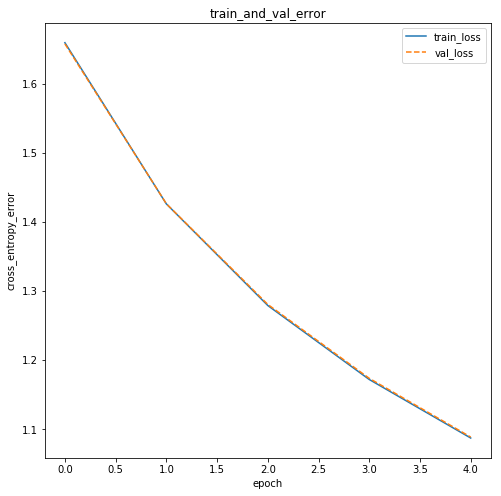

In [62]:
plt.figure(figsize=(8, 8))
plt.plot(one_d_cnn.losses, '-', label='train_loss')
plt.plot(one_d_cnn.val_losses, '--', label='val_loss')
plt.title('train_and_val_error')
plt.xlabel('epoch')
plt.ylabel('cross_entropy_error')
plt.legend()
plt.show()

In [63]:
one_d_cnn.predict(X_test)

array([7, 3, 1, ..., 9, 0, 6], dtype=int64)

In [64]:
one_d_cnn.accuracy(X_test, y_test)

0.7522

【問題3】小さな配列での1次元畳み込み層の実験

In [65]:
x = np.array([1,2,3,4])[np.newaxis, :]
w = np.array([3,5,7])[np.newaxis, :]
b = np.array([1])

In [66]:
output_size=x.shape[1]-w.shape[1] + 1
output_size

2

In [67]:
a = np.zeros(output_size)[np.newaxis, :]
s = w.shape[1]
for n in range(len(x)):
    for i in range(output_size):
        a[n, i] = (np.dot(x[n, i:i+s], w.T)+b).flatten()

print('a {}'.format(a))

delta_a = np.array([10, 20])
delta_a = delta_a[np.newaxis, :]

delta_b = np.sum(delta_a)

delta_w = np.zeros_like(w)
for n in range(len(delta_a)):
    for s in range(delta_w.shape[1]):
        for i in range(delta_a.shape[1]):
            delta_w[0, s] += delta_a[n, i] * x[n, i+s]
            
print('delta_w {}'.format(delta_w))

delta_x = np.zeros_like(x)
for n in range(len(delta_a)):
    for j in range(delta_x.shape[1]):
        for s in range(w.shape[1]):
            if j-s<0:
                continue
            
            elif j-s > delta_a.shape[1]-1:
                continue
            
            delta_x[n, j] += delta_a[n, j-s] * w[0, s]

print('delta_x {}'.format(delta_x))

a [[35. 50.]]
delta_w [[ 50  80 110]]
delta_x [[ 30 110 170 140]]
